In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\bhuvi\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train = pd.read_csv('Downloads/Hand gesture data/sign_mnist_train.csv')

In [3]:
test = pd.read_csv('Downloads/Hand gesture data/sign_mnist_test.csv')

In [4]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
labels = train['label'].values

In [6]:
unique_val=np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

<Axes: ylabel='count'>

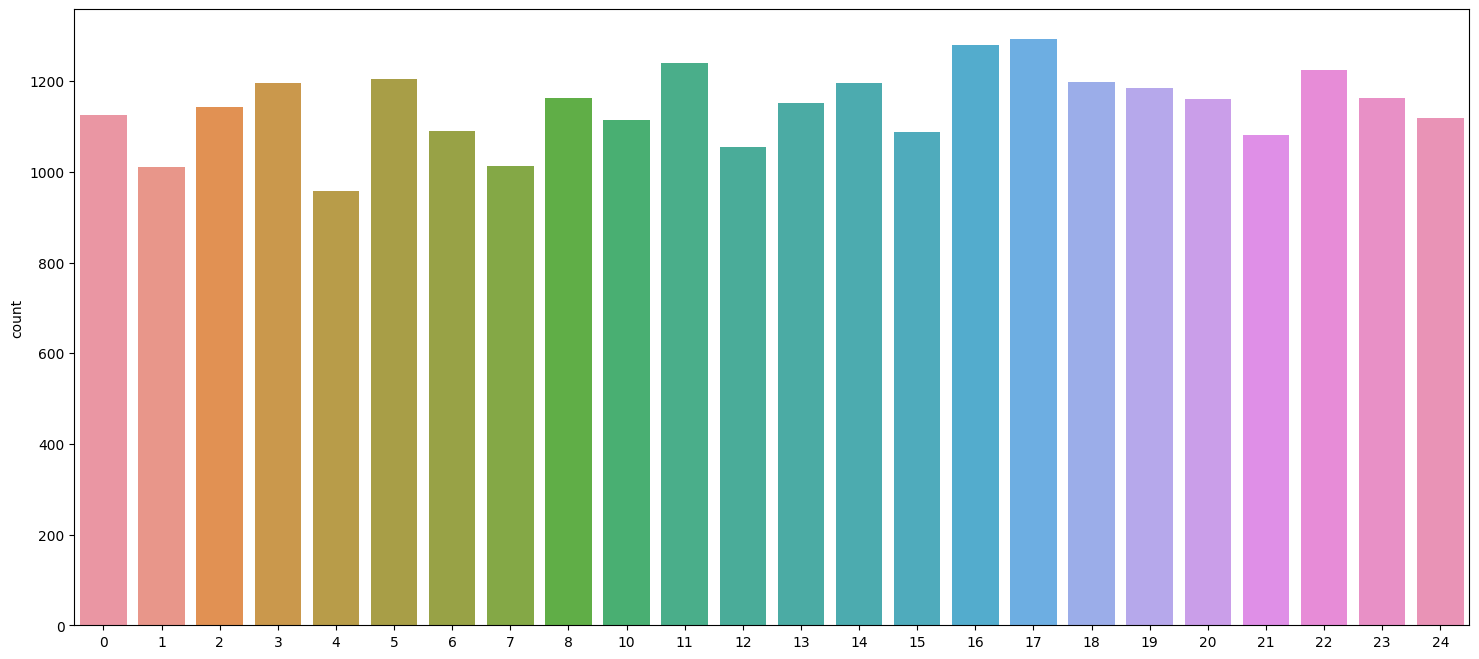

In [7]:
plt.figure(figsize=(18,8))
sns.countplot(x=labels)

In [8]:
train.drop('label',axis=1,inplace=True)

In [9]:
images = train.values
images = np.array([np.reshape(i,(28,28)) for i in images])
images = np.array([i.flatten() for i in images])

In [10]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer=LabelBinarizer()
labels=label_binarizer.fit_transform(labels)

In [11]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [12]:
len(labels[0])

24

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


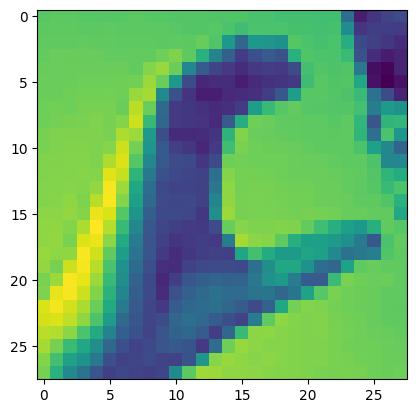

In [13]:
index=2
print(labels[index])
plt.imshow(images[index].reshape(28,28))

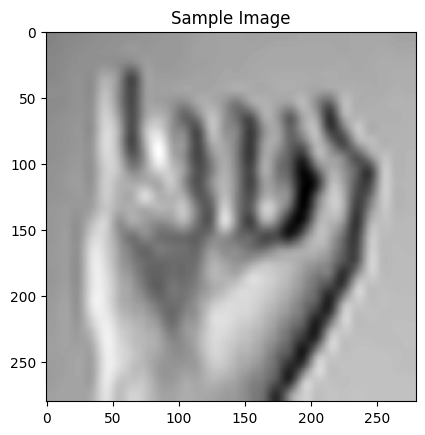

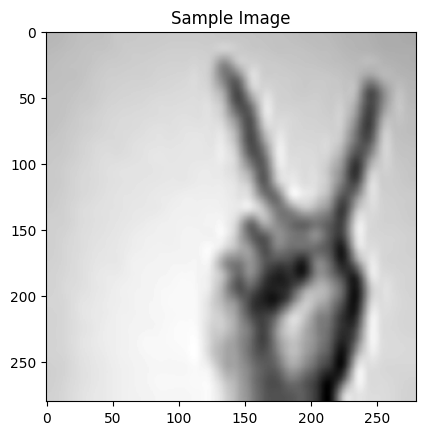

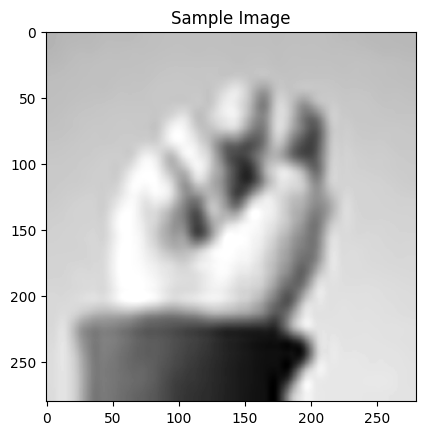

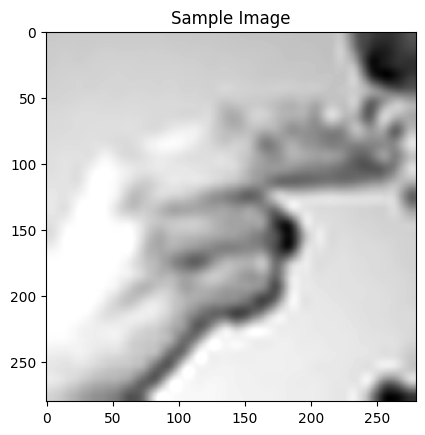

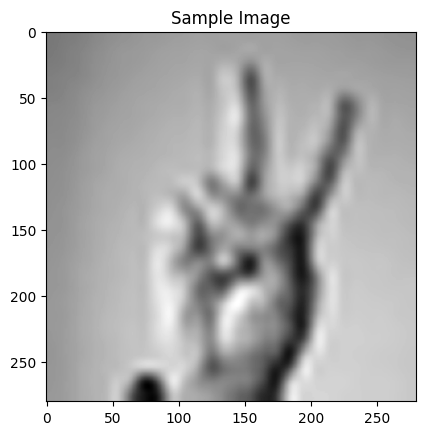

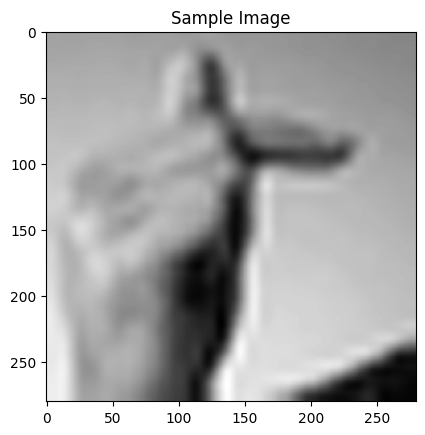

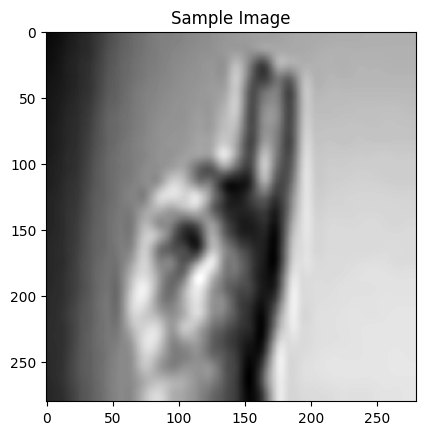

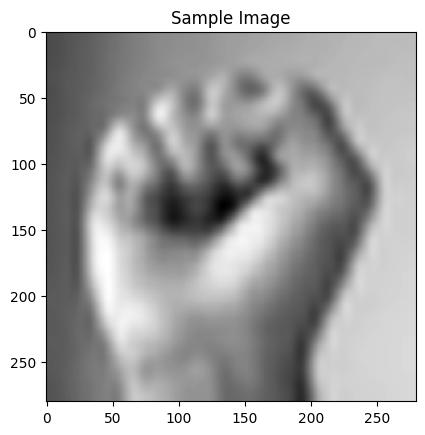

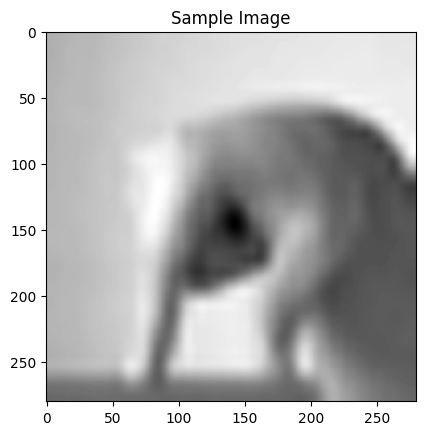

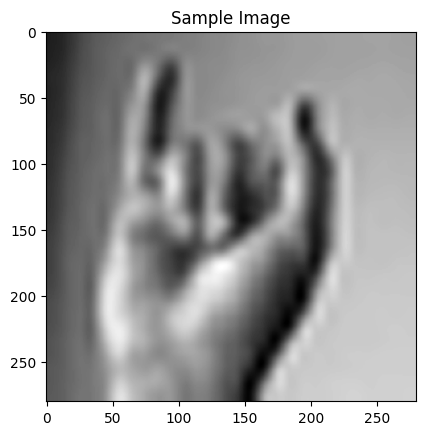

In [14]:
import matplotlib.pyplot as plt
import cv2

for i in range(0, 10):
    rand = np.random.randint(0, len(images))
    input_im = images[rand]
    sample = input_im.reshape(28, 28).astype(np.uint8)
    sample = cv2.resize(sample, None, fx=10, fy=10, interpolation=cv2.INTER_CUBIC)
    plt.imshow(sample, cmap='gray')
    plt.title("Sample Image")
    plt.show()


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=101)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
batch_size=128
num_classes=24
epochs=10

In [17]:
x_train=x_train/255
x_test=x_test/255

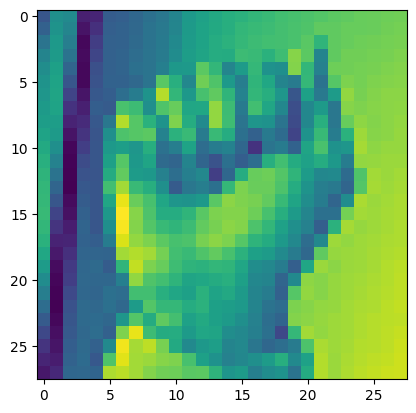

In [18]:
x_train=x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test=x_test.reshape(x_test.shape[0], 28, 28, 1)
plt.imshow(x_train[0].reshape(28,28))

In [19]:

from tensorflow. keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow. keras.optimizers import Adam

model=Sequential()
model.add (Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28,1)))
model.add (MaxPooling2D(pool_size = (2, 2)))
model.add (Conv2D(64, kernel_size = (3, 3), activation='relu'))
model.add (MaxPooling2D (pool_size= (2, 2)))
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add (Flatten())
model.add (Dense(128, activation = 'relu'))
model.add (Dropout (0.20))
model.add (Dense(num_classes, activation = 'softmax'))

In [20]:
model.compile(loss = 'categorical_crossentropy',
optimizer=Adam(),
metrics=['accuracy'])

In [21]:
print (model.summary())

history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 64)          0

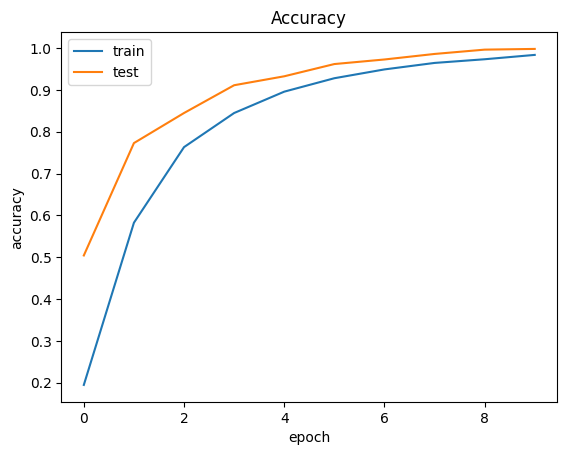

In [22]:
plt.plot (history.history['accuracy'])
plt.plot (history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel ('epoch')
plt.ylabel('accuracy')
plt.legend (['train', 'test'])
plt.show()

In [23]:
test_labels = test['label']
test.drop('label', axis = 1, inplace = True)
test_images = test.values
test_images = np.array([np. reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])
test_labels = label_binarizer.fit_transform(test_labels)
test_images = test_images.reshape(test_images.shape [0], 28, 28, 1)
test_images.shape
y_pred = model.predict(test_images)

225/225 [==============================] - 1s 6ms/step


In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, y_pred.round())

0.8209704406023425

In [25]:
def get_Letter (result):
    classLabels = {0: 'A',
                   1: 'B',
                   2: 'C',
                   3: 'D',
                   4: 'E',
                   5: 'F',
                   6: 'G',
                   7: 'H',
                   8: 'I',
                   9: 'K',
                   10: 'L',
                   11: 'M',
                   12: 'N',
                   13: '0',
                   14: 'P',
                   15: 'Q',
                   16: 'R',
                   17: 'S',
                   18: 'T',
                   19: 'U',
                   20: 'V',
                   21: 'W',
                   22: 'X',
                   23: 'Y' }
    try:
       res = int(result)
       return classLabels[res]
    except:
       return "Error"

In [26]:
!pip install --user opencv-python


In [28]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()

    if not ret:
        print("Error: Failed to capture frame")
        break

    frame = cv2.flip(frame, 1)

    roi = frame[100:400, 320:620]
    cv2.imshow('roi', roi)
    roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi_resized = cv2.resize(roi_gray, (28, 28), interpolation=cv2.INTER_AREA)

    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (255, 0, 0), 5)
    roi_resized = roi_resized.reshape(1, 28, 28, 1)
    
    # Predict probabilities for each class
    probabilities = model.predict(roi_resized)
    
    # Get the predicted class (index of the maximum probability)
    predicted_class = np.argmax(probabilities)
    
    # Get the corresponding letter for the predicted class
    letter = get_Letter(predicted_class)
    
    # Display the predicted letter as text on the frame
    cv2.putText(copy, letter, (300, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)

    cv2.imshow('frame', copy)

    if cv2.waitKey(1) == ord('q'):  # Press 'q' to quit
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 28ms/step
